In [9]:
import math
import statistics
import random
from itertools import combinations
import utils

In [10]:
deck = utils.deck
boring_deck = utils.boring_deck

In [11]:
print(len(deck))
print(deck[0:14])

52
['2♥', '3♥', '4♥', '5♥', '6♥', '7♥', '8♥', '9♥', 'T♥', 'J♥', 'Q♥', 'K♥', 'A♥', '2♦']


In [12]:
starting_hand_size = 6
hand_size = 4

In [13]:
# 52c4 * 48
# where 48 is the remaining cards after you get your hand
unique_hands = math.comb(len(deck), hand_size) * (len(deck) - hand_size)
print(f"{unique_hands=:,}")

unique_hands=12,994,800


In [14]:
# 6 cards dealt to you, you have to discard 2
unique_hands_dealt = math.comb(len(deck), starting_hand_size)
print(f"{unique_hands_dealt=:,}")

# from the 6 dealt, you could discard any 2 of them
unique_sub_hands = math.comb(starting_hand_size, hand_size)
print(f"{unique_sub_hands=:,}")

# this means you can have any combination of 52c6 * 6c2 number of hands
total_possible_hands = unique_hands_dealt * unique_sub_hands
print(f"{total_possible_hands=:,}")

# crib will be made up of (52-6)c2 * 2 of your 6 cards (or 6c2)
possible_crib_hands = math.comb(len(deck) - starting_hand_size, 2) * unique_sub_hands
print(f"{possible_crib_hands=:,}")

unique_hands_dealt=20,358,520
unique_sub_hands=15
total_possible_hands=305,377,800
possible_crib_hands=15,525


In [ ]:
# set of all possible 6 card starting hands
example_starting_hand_list = list(combinations(boring_deck, r=starting_hand_size))
# proof of no duplicates for peace of mind
set_possible_hands = frozenset(example_starting_hand_list)

starting_hands_with_possible_sub_hands = {
    element: list(combinations(element, r=hand_size)) for element in set_possible_hands
}

print(f"{example_starting_hand_list[:10]}")

In [91]:
import pandas as pd


print(f"{example_starting_hand_list[:10]}")
print(f"{len(example_starting_hand_list)=:,}")

smol_starting_hand_list = example_starting_hand_list[:10]

smol_frozen_starting_hand_list = set(frozenset(x) for x in smol_starting_hand_list)

# x = ("2H", "3H", "4H", "5H", "6H", "7H")

# z = ("TS", "QS", "KS", "AD", "JS", "3D")

# y = smol_frozen_starting_hand_list[z]

print(f"{smol_frozen_starting_hand_list=}")


x = {"TS", "QS", "KS", "AD", "JS", "3D"} in smol_frozen_starting_hand_list
y = {"6H", "2D", "4H", "3H", "2H", "5H"} in smol_frozen_starting_hand_list
z = {"6H", "2D", "4H", "3H", "5H", "2H"} in smol_frozen_starting_hand_list

print(f"{x=}")
print(f"{y=}")
print(f"{z=}")

dict_of_everything_smol = {
    element: list(combinations(element, r=hand_size))
    for element in smol_frozen_starting_hand_list
}


test_df = pd.DataFrame(
    dict_of_everything_smol.items(), columns=["starting_hand_set", "sub_hands"]
)

test_df["starting_hand_str"] = test_df.apply(
    lambda row: ",".join(str(x) for x in row["starting_hand_set"]), axis=1
)

x = test_df.loc[test_df["starting_hand_str"] == "6H,2D,4H,3H,2H,5H"]

print(f"{x=}")
test_df.head()

[('2H', '3H', '4H', '5H', '6H', '7H'), ('2H', '3H', '4H', '5H', '6H', '8H'), ('2H', '3H', '4H', '5H', '6H', '9H'), ('2H', '3H', '4H', '5H', '6H', 'TH'), ('2H', '3H', '4H', '5H', '6H', 'JH'), ('2H', '3H', '4H', '5H', '6H', 'QH'), ('2H', '3H', '4H', '5H', '6H', 'KH'), ('2H', '3H', '4H', '5H', '6H', 'AH'), ('2H', '3H', '4H', '5H', '6H', '2D'), ('2H', '3H', '4H', '5H', '6H', '3D')]
len(example_starting_hand_list)=20,358,520
smol_frozen_starting_hand_list={frozenset({'6H', '2D', '4H', '3H', '2H', '5H'}), frozenset({'6H', '4H', '3H', 'QH', '2H', '5H'}), frozenset({'9H', '6H', '4H', '3H', '2H', '5H'}), frozenset({'6H', '4H', '3H', '2H', '5H', 'TH'}), frozenset({'6H', '4H', 'JH', '3H', '2H', '5H'}), frozenset({'6H', '4H', '3H', '2H', '5H', 'AH'}), frozenset({'KH', '6H', '4H', '3H', '2H', '5H'}), frozenset({'6H', '4H', '8H', '3H', '2H', '5H'}), frozenset({'6H', '4H', '3D', '3H', '2H', '5H'}), frozenset({'6H', '4H', '3H', '2H', '5H', '7H'})}
x=False
y=True
z=True
x=          starting_hand_set  \

,starting_hand_set,sub_hands,starting_hand_str
0,"(6H, 2D, 4H, 3H, 2H, 5H)","[(6H, 2D, 4H, 3H), (6H, 2D, 4H, 2H), (6H, 2D, ...","6H,2D,4H,3H,2H,5H"
1,"(6H, 4H, 3H, QH, 2H, 5H)","[(6H, 4H, 3H, QH), (6H, 4H, 3H, 2H), (6H, 4H, ...","6H,4H,3H,QH,2H,5H"
2,"(9H, 6H, 4H, 3H, 2H, 5H)","[(9H, 6H, 4H, 3H), (9H, 6H, 4H, 2H), (9H, 6H, ...","9H,6H,4H,3H,2H,5H"
3,"(6H, 4H, 3H, 2H, 5H, TH)","[(6H, 4H, 3H, 2H), (6H, 4H, 3H, 5H), (6H, 4H, ...","6H,4H,3H,2H,5H,TH"
4,"(6H, 4H, JH, 3H, 2H, 5H)","[(6H, 4H, JH, 3H), (6H, 4H, JH, 2H), (6H, 4H, ...","6H,4H,JH,3H,2H,5H"


In [31]:
import pandas as pd

print(starting_hands_with_possible_sub_hands.get(("TS", "QS", "KS", "AD", "JS", "3D")))
# starting_hands_with_possible_sub_hands.keys()
starting_hands_df = pd.DataFrame(starting_hands_with_possible_sub_hands)

None


In [15]:
# example_starting_hand = random.choices(deck, k=starting_hand_size)
# We'll use a set "random" starting hand for now
# example_starting_hand = ["T♠", "Q♠", "K♥", "A♦", "J♠", "3♥"]
example_starting_hand = ["TS", "QS", "KS", "AD", "JS", "3D"]
print(f"{example_starting_hand=}")

# remaining_deck = deck.copy()
remaining_deck = boring_deck.copy()
for cut_card in example_starting_hand:
    remaining_deck.remove(cut_card)
print(f"{len(remaining_deck)=}")

possible_hands = list(combinations(example_starting_hand, r=hand_size))
set_possible_hands = set(possible_hands)  # proof of no duplicates for peace of mind
print(f"{len(possible_hands)=}")
print(f"{possible_hands=}")

possible_complete_hands = []
for possible_hand in possible_hands:
    for cut_card in remaining_deck:
        complete_hand = possible_hand + (cut_card,)
        possible_complete_hands.append(complete_hand)

set_possible_complete_hands = set(
    possible_complete_hands
)  # proof of no duplicates for peace of mind

print(f"{len(possible_complete_hands)=}")
print(f"{possible_complete_hands[:5]=}")

example_starting_hand=['TS', 'QS', 'KS', 'AD', 'JS', '3D']
len(remaining_deck)=46
len(possible_hands)=15
possible_hands=[('TS', 'QS', 'KS', 'AD'), ('TS', 'QS', 'KS', 'JS'), ('TS', 'QS', 'KS', '3D'), ('TS', 'QS', 'AD', 'JS'), ('TS', 'QS', 'AD', '3D'), ('TS', 'QS', 'JS', '3D'), ('TS', 'KS', 'AD', 'JS'), ('TS', 'KS', 'AD', '3D'), ('TS', 'KS', 'JS', '3D'), ('TS', 'AD', 'JS', '3D'), ('QS', 'KS', 'AD', 'JS'), ('QS', 'KS', 'AD', '3D'), ('QS', 'KS', 'JS', '3D'), ('QS', 'AD', 'JS', '3D'), ('KS', 'AD', 'JS', '3D')]
len(possible_complete_hands)=690
possible_complete_hands[:5]=[('TS', 'QS', 'KS', 'AD', '2H'), ('TS', 'QS', 'KS', 'AD', '3H'), ('TS', 'QS', 'KS', 'AD', '4H'), ('TS', 'QS', 'KS', 'AD', '5H'), ('TS', 'QS', 'KS', 'AD', '6H')]


In [16]:
# import requests
# import csv

# with open("crib_hands_smol.csv", "w") as csv_file:
#     writer = csv.writer(csv_file)

#     headers = [
#         "points",
#         "hand_card_1",
#         "hand_card_2",
#         "hand_card_3",
#         "hand_card_4",
#         "cut_card",
#     ]
#     writer.writerow(headers)

#     for full_hand in possible_complete_hands:
#         full_hand = list(full_hand)
#         path_param = ",".join(full_hand)

#         # Credit to https://github.com/dkackman/CribbageCounter.
#         # You can run run the server locally so you don't spam his API.
#         # url = (
#         #     f"https://cribbagecounter.kackman.net/api/score?hand={path_param}&isCrib=false"
#         # )
#         url = f"http://localhost:3000/api/score?hand={path_param}&isCrib=false"
#         response = requests.get(url)
#         val = response.text
#         row = [val] + full_hand
#         writer.writerow(row)

In [17]:
import pandas as pd

# csv_df = pd.read_csv("crib_hands_smol.csv")
csv_df = pd.read_csv("crib_hands.csv")

# making columns easier to work with
csv_df["hand"] = (
    csv_df["hand_card_1"]
    + ","
    + csv_df["hand_card_2"]
    + ","
    + csv_df["hand_card_3"]
    + ","
    + csv_df["hand_card_4"]
)
csv_df = csv_df.drop(
    columns=["hand_card_1", "hand_card_2", "hand_card_3", "hand_card_4"]
)

df = csv_df.groupby("hand").agg(list).reset_index()

# checks to make sure the data is correct
print(len(df["points"][0]) == 46)  # 52 - starting hand size
print(len(df["cut_card"]) == len(df["points"]))

df["points_by_cut"] = df.apply(
    lambda row: dict(zip(row["cut_card"], row["points"])),
    axis=1,
)

df["cut_by_points"] = df.apply(
    lambda row: list(zip(row["points"], row["cut_card"])),
    axis=1,
)

# TODO
# df["cut_by_points_histogram"] = df.apply(
#     lambda row: for t in row["cut_by_points"]:
#         t_1, t_2 = ,
#     axis=1,
# )

print(len(df["cut_card"]) == len(df["points_by_cut"]))
print(len(df["cut_card"]) == len(df["cut_by_points"]))
# df = df.drop(columns=["cut_card"])

df["ev"] = df.apply(lambda row: statistics.fmean(row["points"]), axis=1)
df["stdev"] = df.apply(lambda row: statistics.stdev(row["points"]), axis=1)
df["max"] = df.apply(lambda row: max(row["points"]), axis=1)
df["min"] = df.apply(lambda row: min(row["points"]), axis=1)

print("\n-------ANALYSIS-------\n")
print(df.shape)
print(df.iloc[0])

False
True
True
True

-------ANALYSIS-------

(270725, 9)
hand                                                   2C,3C,4C,5C
points           [14, 16, 16, 16, 13, 10, 12, 10, 12, 12, 12, 1...
cut_card         [2H, 3H, 4H, 5H, 6H, 7H, 8H, 9H, TH, JH, QH, K...
points_by_cut    {'2H': 14, '3H': 16, '4H': 16, '5H': 16, '6H':...
cut_by_points    [(14, 2H), (16, 3H), (16, 4H), (16, 5H), (13, ...
ev                                                       12.479167
stdev                                                     2.342844
max                                                             16
min                                                              7
Name: 0, dtype: object


In [22]:
df["max_less_ev"] = df.apply(lambda row: max(row["points"]) - row["ev"], axis=1)

,hand,points,cut_card,points_by_cut,cut_by_points,ev,stdev,max,min,max_less_ev
0,"2C,3C,4C,5C","[14, 16, 16, 16, 13, 10, 12, 10, 12, 12, 12, 1...","[2H, 3H, 4H, 5H, 6H, 7H, 8H, 9H, TH, JH, QH, K...","{'2H': 14, '3H': 16, '4H': 16, '5H': 16, '6H':...","[(14, 2H), (16, 3H), (16, 4H), (16, 5H), (13, ...",12.479167,2.342844,16,7,3.520833
1,"2C,3C,4C,6C","[16, 16, 16, 13, 15, 11, 11, 13, 11, 11, 11, 1...","[2H, 3H, 4H, 5H, 6H, 7H, 8H, 9H, TH, JH, QH, K...","{'2H': 16, '3H': 16, '4H': 16, '5H': 13, '6H':...","[(16, 2H), (16, 3H), (16, 4H), (13, 5H), (15, ...",12.375000,2.548466,16,6,3.625000
2,"2C,3C,4C,7C","[14, 14, 14, 10, 11, 9, 11, 9, 9, 9, 9, 9, 6, ...","[2H, 3H, 4H, 5H, 6H, 7H, 8H, 9H, TH, JH, QH, K...","{'2H': 14, '3H': 14, '4H': 14, '5H': 10, '6H':...","[(14, 2H), (14, 3H), (14, 4H), (10, 5H), (11, ...",10.375000,2.159836,14,6,3.625000
3,"2C,3C,4C,8C","[16, 16, 16, 12, 11, 11, 13, 11, 11, 11, 11, 1...","[2H, 3H, 4H, 5H, 6H, 7H, 8H, 9H, TH, JH, QH, K...","{'2H': 16, '3H': 16, '4H': 16, '5H': 12, '6H':...","[(16, 2H), (16, 3H), (16, 4H), (12, 5H), (11, ...",12.166667,2.147075,16,8,3.833333
4,"2C,3C,4C,9C","[16, 16, 16, 10, 13, 9, 11, 13, 11, 11, 11, 11...","[2H, 3H, 4H, 5H, 6H, 7H, 8H, 9H, TH, JH, QH, K...","{'2H': 16, '3H': 16, '4H': 16, '5H': 10, '6H':...","[(16, 2H), (16, 3H), (16, 4H), (10, 5H), (13, ...",12.000000,2.361031,16,8,4.000000


In [23]:
df.sort_values(by="max", ascending=False)

,hand,points,cut_card,points_by_cut,cut_by_points,ev,stdev,max,min,max_less_ev
98898,"5H,5D,JS,5C","[14, 14, 14, 14, 14, 14, 14, 20, 22, 20, 20, 1...","[2H, 3H, 4H, 6H, 7H, 8H, 9H, TH, JH, QH, KH, A...","{'2H': 14, '3H': 14, '4H': 14, '6H': 14, '7H':...","[(14, 2H), (14, 3H), (14, 4H), (14, 6H), (14, ...",16.541667,3.530766,29,14,12.458333
217187,"JH,5D,5S,5C","[15, 15, 15, 29, 15, 15, 15, 15, 21, 21, 21, 1...","[2H, 3H, 4H, 5H, 6H, 7H, 8H, 9H, TH, QH, KH, A...","{'2H': 15, '3H': 15, '4H': 15, '5H': 29, '6H':...","[(15, 2H), (15, 3H), (15, 4H), (29, 5H), (15, ...",16.541667,3.530766,29,14,12.458333
107444,"5H,JD,5S,5C","[14, 14, 14, 14, 14, 14, 14, 20, 22, 20, 20, 1...","[2H, 3H, 4H, 6H, 7H, 8H, 9H, TH, JH, QH, KH, A...","{'2H': 14, '3H': 14, '4H': 14, '6H': 14, '7H':...","[(14, 2H), (14, 3H), (14, 4H), (14, 6H), (14, ...",16.541667,3.530766,29,14,12.458333
98582,"5H,5D,5S,JC","[14, 14, 14, 14, 14, 14, 14, 20, 22, 20, 20, 1...","[2H, 3H, 4H, 6H, 7H, 8H, 9H, TH, JH, QH, KH, A...","{'2H': 14, '3H': 14, '4H': 14, '6H': 14, '7H':...","[(14, 2H), (14, 3H), (14, 4H), (14, 6H), (14, ...",16.541667,3.530766,29,14,12.458333
110054,"5H,QD,5S,5C","[14, 14, 14, 14, 14, 14, 14, 20, 20, 22, 20, 1...","[2H, 3H, 4H, 6H, 7H, 8H, 9H, TH, JH, QH, KH, A...","{'2H': 14, '3H': 14, '4H': 14, '6H': 14, '7H':...","[(14, 2H), (14, 3H), (14, 4H), (14, 6H), (14, ...",16.291667,3.476109,28,14,11.708333
...,...,...,...,...,...,...,...,...,...,...
235465,"KH,9D,QD,3S","[4, 4, 0, 4, 2, 0, 0, 2, 0, 3, 2, 0, 4, 4, 0, ...","[2H, 3H, 4H, 5H, 6H, 7H, 8H, 9H, TH, JH, QH, A...","{'2H': 4, '3H': 4, '4H': 0, '5H': 4, '6H': 2, ...","[(4, 2H), (4, 3H), (0, 4H), (4, 5H), (2, 6H), ...",1.708333,1.623738,4,0,2.291667
235464,"KH,9D,QD,3C","[4, 4, 0, 4, 2, 0, 0, 2, 0, 3, 2, 0, 4, 4, 0, ...","[2H, 3H, 4H, 5H, 6H, 7H, 8H, 9H, TH, JH, QH, A...","{'2H': 4, '3H': 4, '4H': 0, '5H': 4, '6H': 2, ...","[(4, 2H), (4, 3H), (0, 4H), (4, 5H), (2, 6H), ...",1.708333,1.623738,4,0,2.291667
235463,"KH,9D,QD,2S","[2, 4, 2, 4, 2, 0, 0, 2, 0, 3, 2, 0, 2, 4, 2, ...","[2H, 3H, 4H, 5H, 6H, 7H, 8H, 9H, TH, JH, QH, A...","{'2H': 2, '3H': 4, '4H': 2, '5H': 4, '6H': 2, ...","[(2, 2H), (4, 3H), (2, 4H), (4, 5H), (2, 6H), ...",1.750000,1.436604,4,0,2.250000
57692,"3H,QH,TD,6C","[4, 0, 4, 4, 0, 0, 2, 2, 3, 0, 0, 4, 2, 0, 4, ...","[2H, 4H, 5H, 6H, 7H, 8H, 9H, TH, JH, KH, AH, 2...","{'2H': 4, '4H': 0, '5H': 4, '6H': 4, '7H': 0, ...","[(4, 2H), (0, 4H), (4, 5H), (4, 6H), (0, 7H), ...",1.708333,1.623738,4,0,2.291667


GRAPHING BELOW THIS


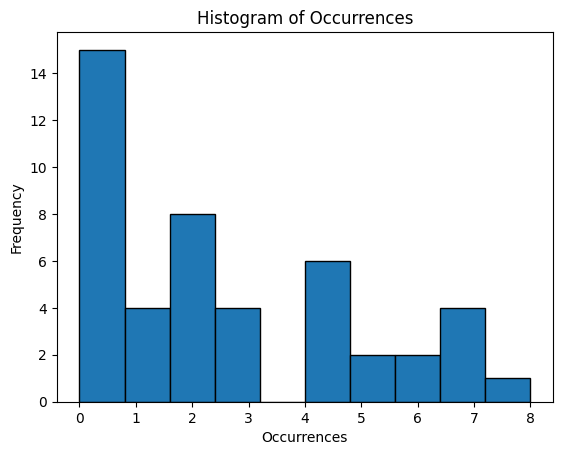

In [17]:
import matplotlib.pyplot as plt

# Sample dictionary (replace with your actual data)
data = df["points_by_cut"][0]

# Extract values (occurrences) from the dictionary
scores = list(data.values())

# Plot histogram
plt.hist(scores, bins=10, edgecolor="black")

# Add labels and title
plt.xlabel("Occurrences")
plt.ylabel("Frequency")
plt.title("Histogram of Occurrences")

# Display the plot
plt.show()

[{'2H': 7, '3H': 2, '4H': 4, '5H': 4, '6H': 0, '7H': 0, '8H': 0, '9H': 0, 'TH': 0, 'JH': 2, 'QH': 3, 'KH': 2, 'AH': 6, '2D': 7, '4D': 4, '5D': 4, '6D': 0, '7D': 0, '8D': 0, '9D': 0, 'TD': 0, 'JD': 2, 'QD': 3, 'KD': 2, '2S': 8, '3S': 3, '4S': 5, '5S': 5, '6S': 1, '7S': 1, '8S': 1, '9S': 1, 'AS': 7, '2C': 7, '3C': 2, '4C': 4, '5C': 4, '6C': 0, '7C': 0, '8C': 0, '9C': 0, 'TC': 0, 'JC': 2, 'QC': 3, 'KC': 2, 'AC': 6}, {'2H': 7, '3H': 2, '4H': 4, '5H': 4, '6H': 0, '7H': 0, '8H': 0, '9H': 0, 'TH': 3, 'JH': 2, 'QH': 2, 'KH': 3, 'AH': 6, '2D': 7, '4D': 4, '5D': 4, '6D': 0, '7D': 0, '8D': 0, '9D': 0, 'TD': 3, 'JD': 2, 'QD': 2, 'KD': 3, '2S': 8, '3S': 3, '4S': 5, '5S': 5, '6S': 1, '7S': 1, '8S': 1, '9S': 1, 'AS': 7, '2C': 7, '3C': 2, '4C': 4, '5C': 4, '6C': 0, '7C': 0, '8C': 0, '9C': 0, 'TC': 3, 'JC': 2, 'QC': 2, 'KC': 3, 'AC': 6}, {'2H': 7, '3H': 2, '4H': 4, '5H': 4, '6H': 0, '7H': 0, '8H': 0, '9H': 0, 'TH': 0, 'JH': 3, 'QH': 2, 'KH': 2, 'AH': 6, '2D': 7, '4D': 4, '5D': 4, '6D': 0, '7D': 0, '8D'

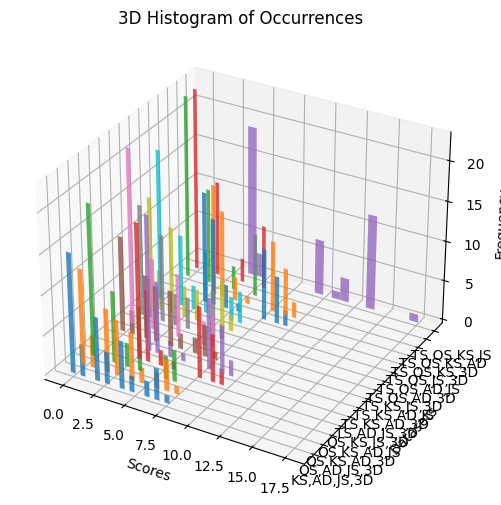

In [32]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Sample data (replace with your actual datasets)
# datasets = [
#     {"Category1": 10, "Category2": 5, "Category3": 12, "Category4": 12, "Category5": 3},
#     {"Category1": 8, "Category2": 6, "Category3": 7, "Category4": 11, "Category5": 4},
#     {"Category1": 12, "Category2": 7, "Category3": 9, "Category4": 14, "Category5": 2},
# ]

datasets = df["points_by_cut"].tolist()
print(datasets)

# Create figure and 3D axes
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection="3d")

# Number of bins for the histogram
num_bins = 20

# Initialize lists to store histograms and bin edges
hists = []
bins = []

# Plot histograms for each dataset
for i, data in enumerate(datasets):
    scores = list(data.values())
    hist, bin_edges = np.histogram(scores, bins=num_bins)
    hists.append(hist)
    bins.append(bin_edges)

    # Set bar heights and positions along z-axis
    zpos = i
    dx = np.diff(bin_edges)[0]

    # Plotting bars
    ax.bar(
        bins[i][:-1],
        hists[i],
        zs=zpos,
        zdir="y",
        alpha=0.8,
        width=dx,
        label=df["hand"][i],
    )

# Labeling axes and title
ax.set_xlabel("Scores")
ax.set_ylabel("Datasets")
ax.set_zlabel("Frequency")
ax.set_title("3D Histogram of Occurrences")

# Setting ticks and labels
ax.set_yticks(np.arange(len(datasets)))
ax.set_yticklabels([df["hand"][i] for i in range(len(datasets))])


plt.show()